In [1]:
%matplotlib notebook
%run api.py

<IPython.core.display.Javascript object>


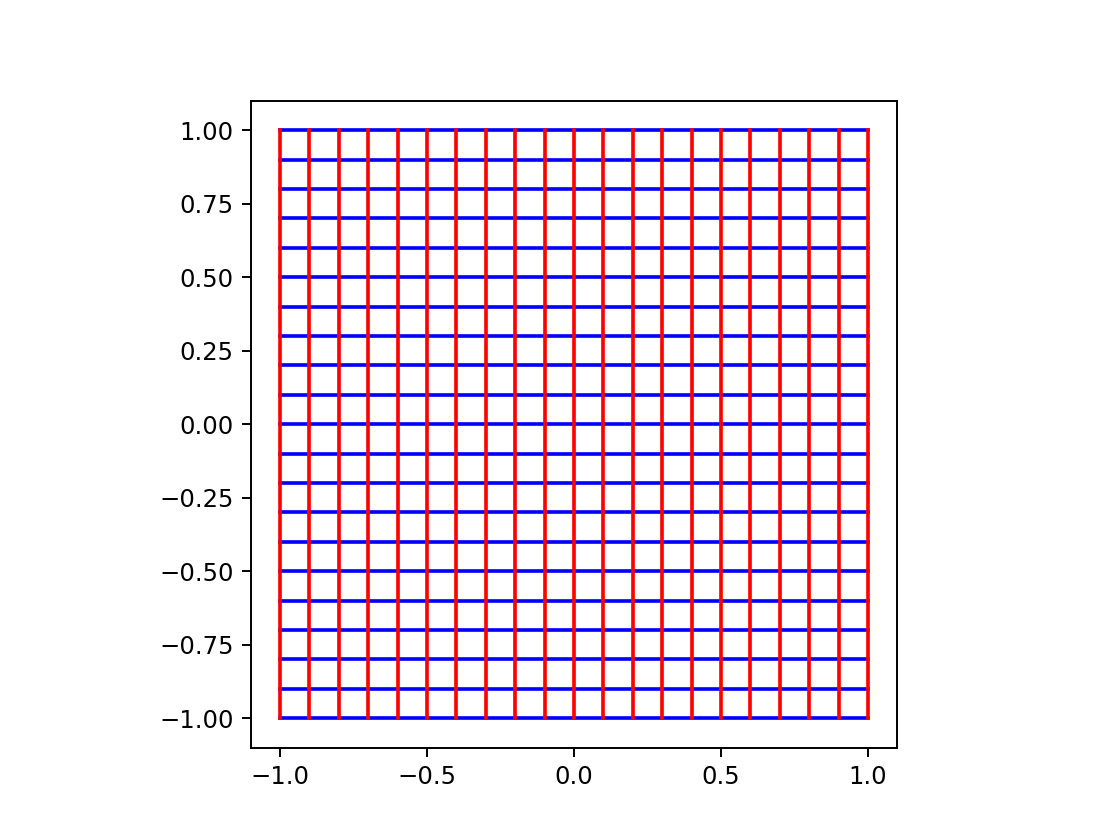

In [2]:
grid = init_grid(nb_pts=1000)
plot_map(grid)

<IPython.core.display.Javascript object>


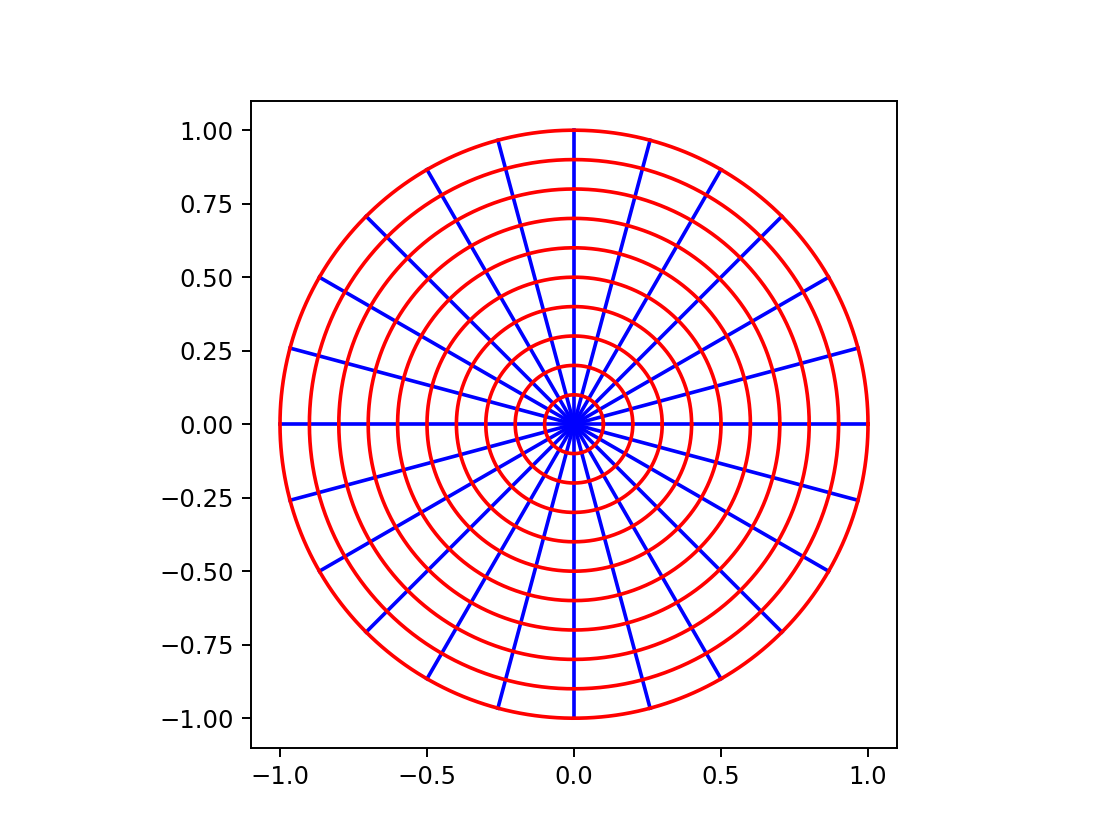

In [3]:
polar = init_polar(nb_pts=1000)
plot_map(polar)